In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_files_healthy = "/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train/Apple___Healthy"
train_files_black_rot = "/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train/Apple___Black_rot"
train_files_scab = "/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train/Apple___Scab"
train_files_rust = "/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train/Apple___Cedar_apple_rust"

In [4]:
test_files_healthy = "/content/drive/MyDrive/Project/Apple Plant Disease/Test/Test/Apple___Healthy"
test_files_black_rot = "/content/drive/MyDrive/Project/Apple Plant Disease/Test/Test/Apple___Black_rot"
test_files_scab = "/content/drive/MyDrive/Project/Apple Plant Disease/Test/Test/Apple___Scab"
test_files_rust = "/content/drive/MyDrive/Project/Apple Plant Disease/Test/Test/Apple___Cedar_apple_rust"

In [5]:
valid_files_healthy = "/content/drive/MyDrive/Project/Apple Plant Disease/Validation/Validation/Apple___Healthy"
valid_files_black_rot = "/content/drive/MyDrive/Project/Apple Plant Disease/Validation/Validation/Apple___Black_rot"
valid_files_scab = "/content/drive/MyDrive/Project/Apple Plant Disease/Validation/Validation/Apple___Scab"
valid_files_rust = "/content/drive/MyDrive/Project/Apple Plant Disease/Validation/Validation/Apple___Cedar_apple_rust"

In [6]:
print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of black rot leaf images in training set", total_files(train_files_black_rot))
print("Number of scab leaf images in training set", total_files(train_files_scab))
print("Number of rust leaf images in training set", total_files(train_files_rust))

Number of healthy leaf images in training set 4016
Number of black rot leaf images in training set 3974
Number of scab leaf images in training set 4032
Number of rust leaf images in training set 3520


In [7]:
print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of black rot leaf images in test set", total_files(test_files_black_rot))
print("Number of scab leaf images in test set", total_files(test_files_scab))
print("Number of rust leaf images in test set", total_files(test_files_rust))

Number of healthy leaf images in test set 19
Number of black rot leaf images in test set 19
Number of scab leaf images in test set 23
Number of rust leaf images in test set 23


In [8]:
print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of black rot leaf images in validation set", total_files(valid_files_black_rot))
print("Number of scab leaf images in validation set", total_files(valid_files_scab))
print("Number of rust leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in validation set 1004
Number of black rot leaf images in validation set 994
Number of scab leaf images in validation set 1008
Number of rust leaf images in validation set 880


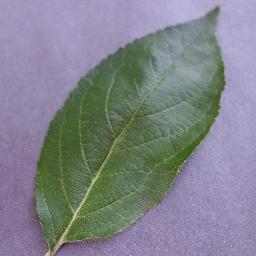

In [9]:
from PIL import Image
import IPython.display as display

image_path = "/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train/Apple___Healthy/00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708(1).JPG"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

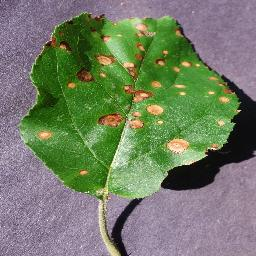

In [10]:
image_path = "/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train/Apple___Black_rot/0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S 2784(1).JPG"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width = 500))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Project/Apple Plant Disease/Train/Train',
                                                    target_size =(225, 225),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Project/Apple Plant Disease/Validation/Validation',
                                                        target_size = (225, 225),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 15542 images belonging to 4 classes.
Found 3886 images belonging to 4 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape = (225, 225, 3)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(train_generator,
                    batch_size = 32,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_batch_size = 16
                   )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 5180s 11s/step - accuracy: 0.7269 - loss: 0.9194 - val_accuracy: 0.9120 - val_loss: 0.2445
Epoch 2/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 240s 494ms/step - accuracy: 0.9413 - loss: 0.1715 - val_accuracy: 0.9439 - val_loss: 0.1905
Epoch 3/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 243s 500ms/step - accuracy: 0.9576 - loss: 0.1165 - val_accuracy: 0.9099 - val_loss: 0.3288
Epoch 4/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 237s 487ms/step - accuracy: 0.9697 - loss: 0.0901 - val_accuracy: 0.9686 - val_loss: 0.1180
Epoch 5/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 239s 492ms/step - accuracy: 0.9719 - loss: 0.0756 - val_accuracy: 0.9593 - val_loss: 0.1071
Epoch 6/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 240s 493ms/step - accuracy: 0.9770 - loss: 0.0649 - val_accuracy: 0.9851 - val_loss: 0.0480
Epoch 7/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 235s 483ms/step - accuracy: 0.9811 - loss: 0.0550 - val_accuracy: 0.9701 - val_loss: 0.0722
Epoch 8/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 235s 484ms/step - accuracy: 0.9775 - 

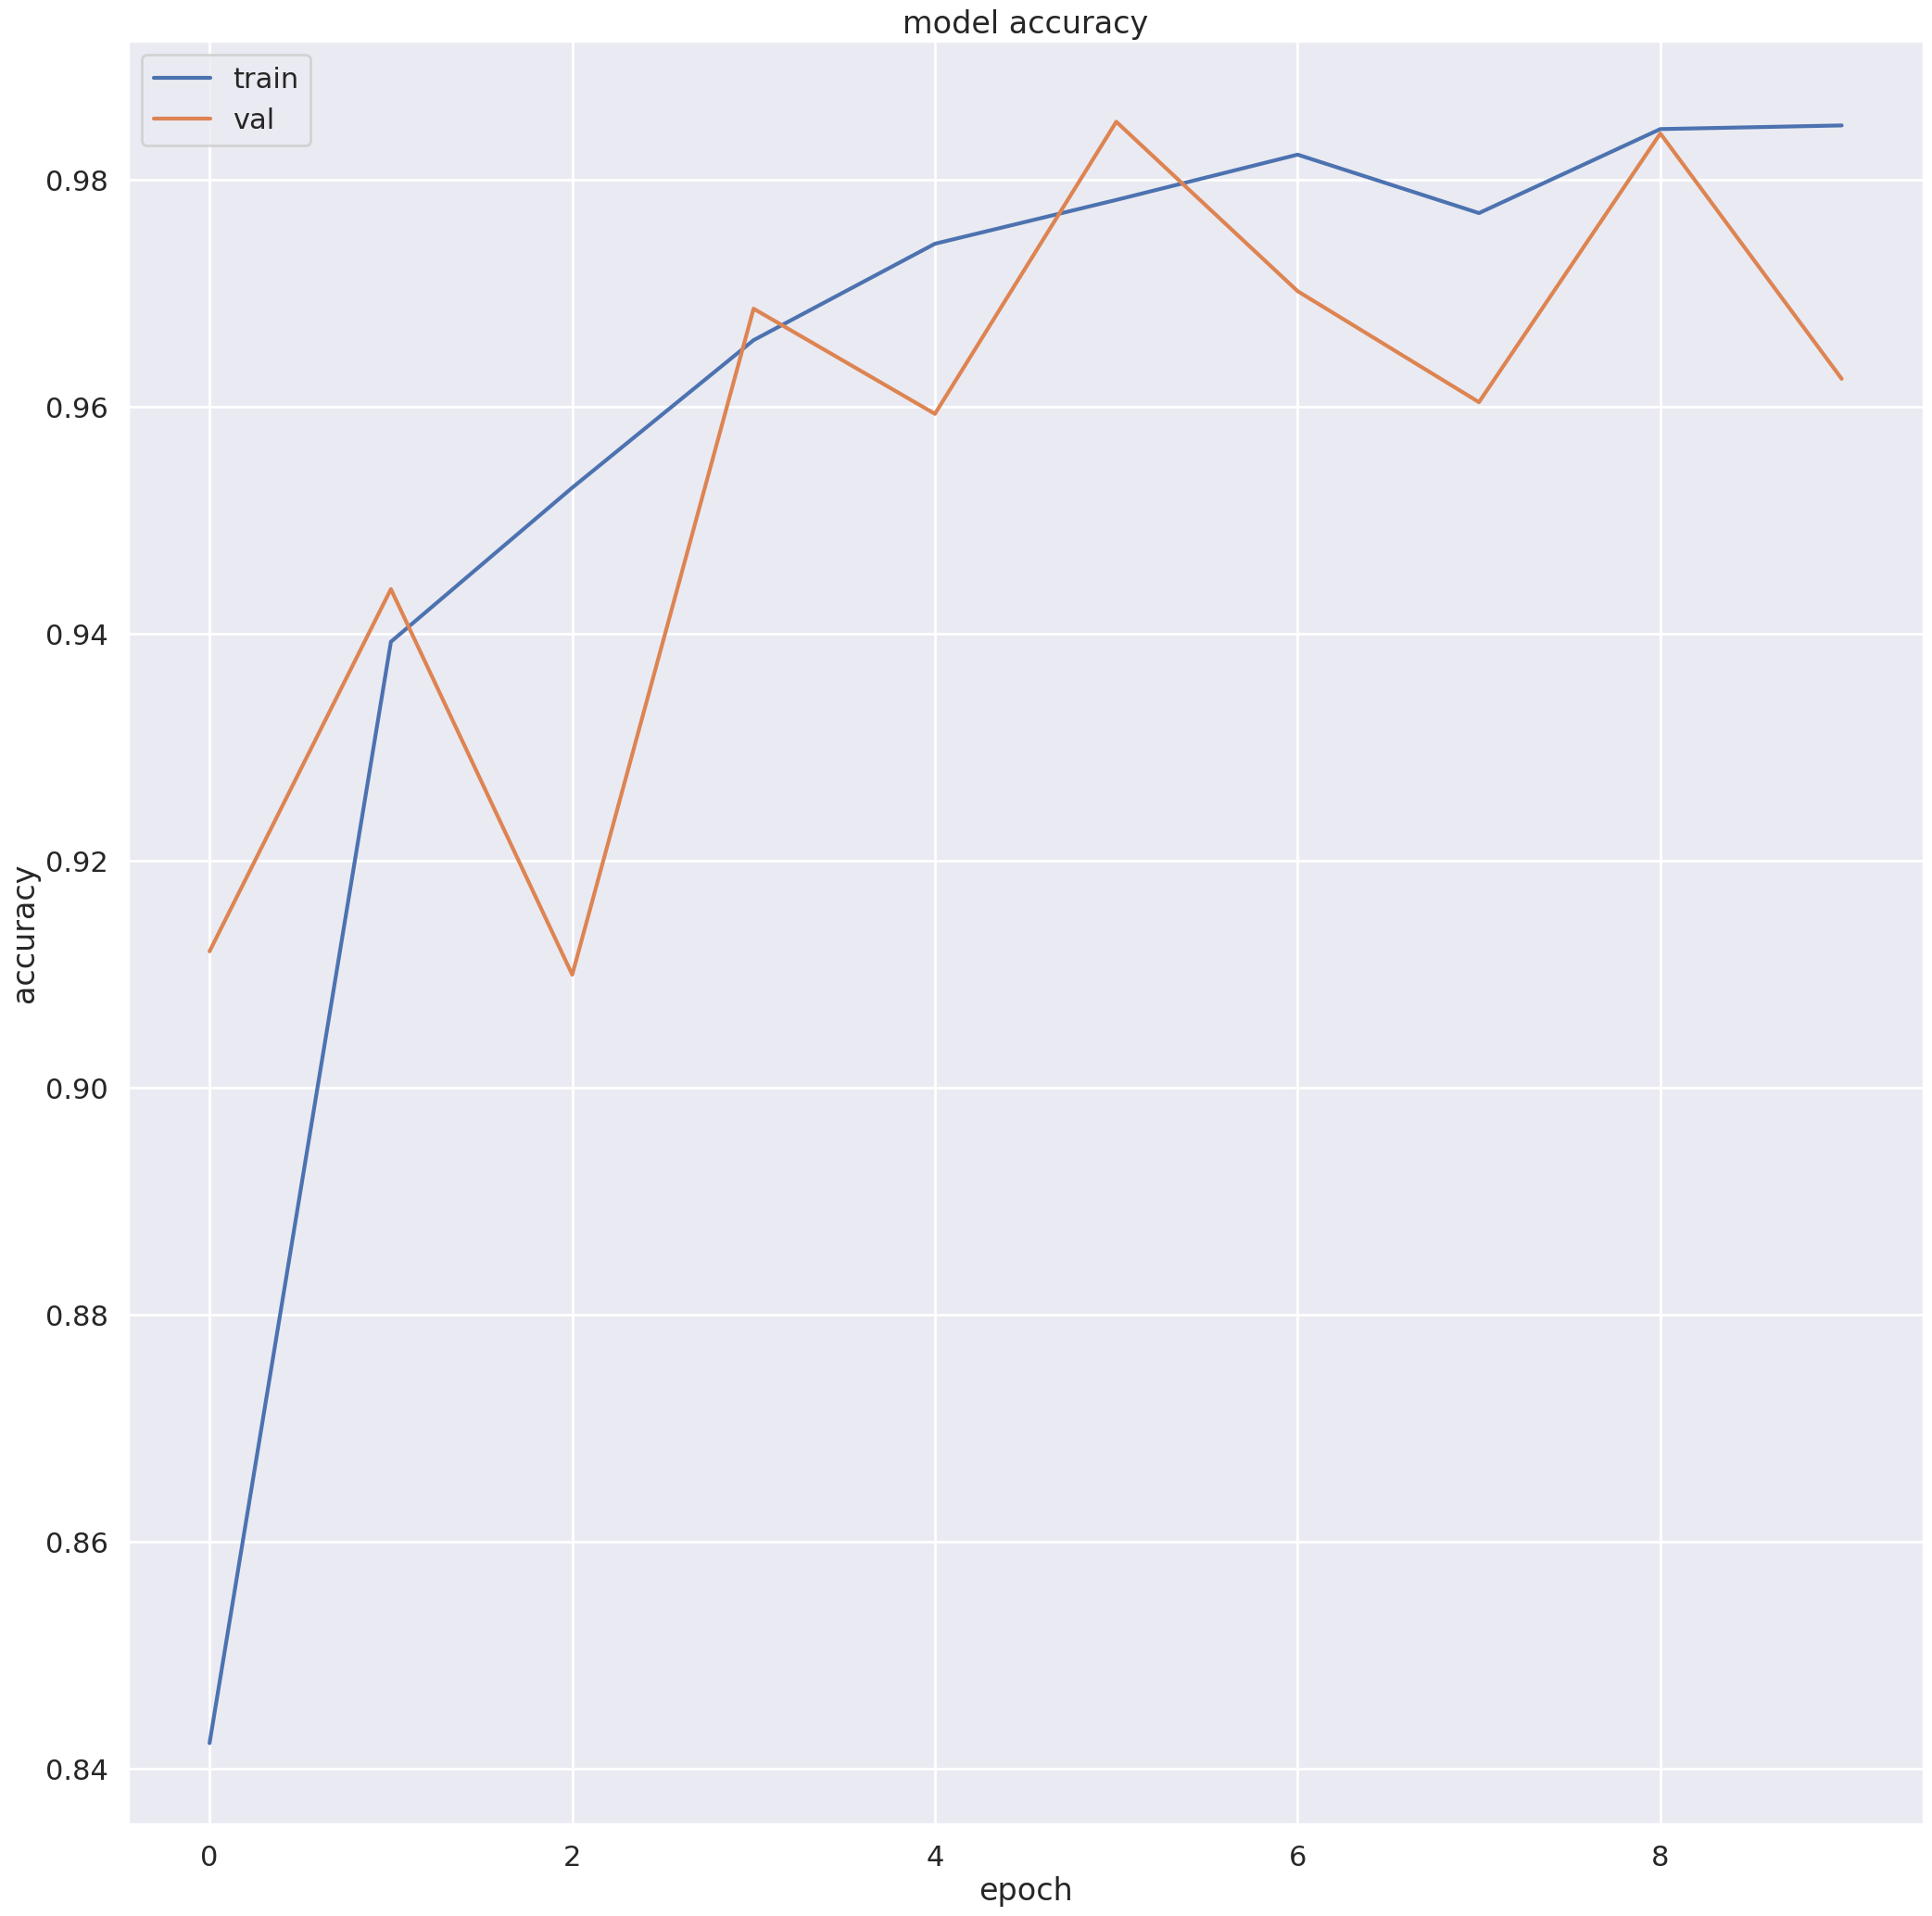

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize = (25, 25), dpi = 100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop

In [18]:
def create_mobilenetv2_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(225, 225, 3))
    base_model.trainable = False  # Freeze convolutional layers

    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Ensure x is a valid tensor
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(4, activation='softmax')(x)  # Ensure output is correctly defined

    model = Model(inputs=base_model.input, outputs=output_layer)  # Use output_layer instead of x
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
mobilenetv2_model = create_mobilenetv2_model()

history_mobilenetv2 = mobilenetv2_model.fit(train_generator,
                                            epochs=10,
                                            validation_data=validation_generator)


<ipython-input-18-f5f4057f23c8>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(225, 225, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 256s 509ms/step - accuracy: 0.8094 - loss: 0.5804 - val_accuracy: 0.9640 - val_loss: 0.1197
Epoch 2/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 240s 493ms/step - accuracy: 0.9745 - loss: 0.0940 - val_accuracy: 0.9820 - val_loss: 0.0699
Epoch 3/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 244s 503ms/step - accuracy: 0.9850 - loss: 0.0589 - val_accuracy: 0.9830 - val_loss: 0.0553
Epoch 4/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 236s 485ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9866 - val_loss: 0.0442
Epoch 5/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 238s 490ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9871 - val_loss: 0.0410
Epoch 6/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 238s 489ms/step - accuracy: 0.9925 - loss: 0.0293 - val_accuracy: 0.9871 - val_loss: 0.0400
Epoch 7/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 236s 487ms/step - accuracy: 0.9910 - loss: 0.0297 - val_accuracy: 0.9892 - val_loss: 0.0380
Epoch 8/10
486/486 ━━━━━━━━

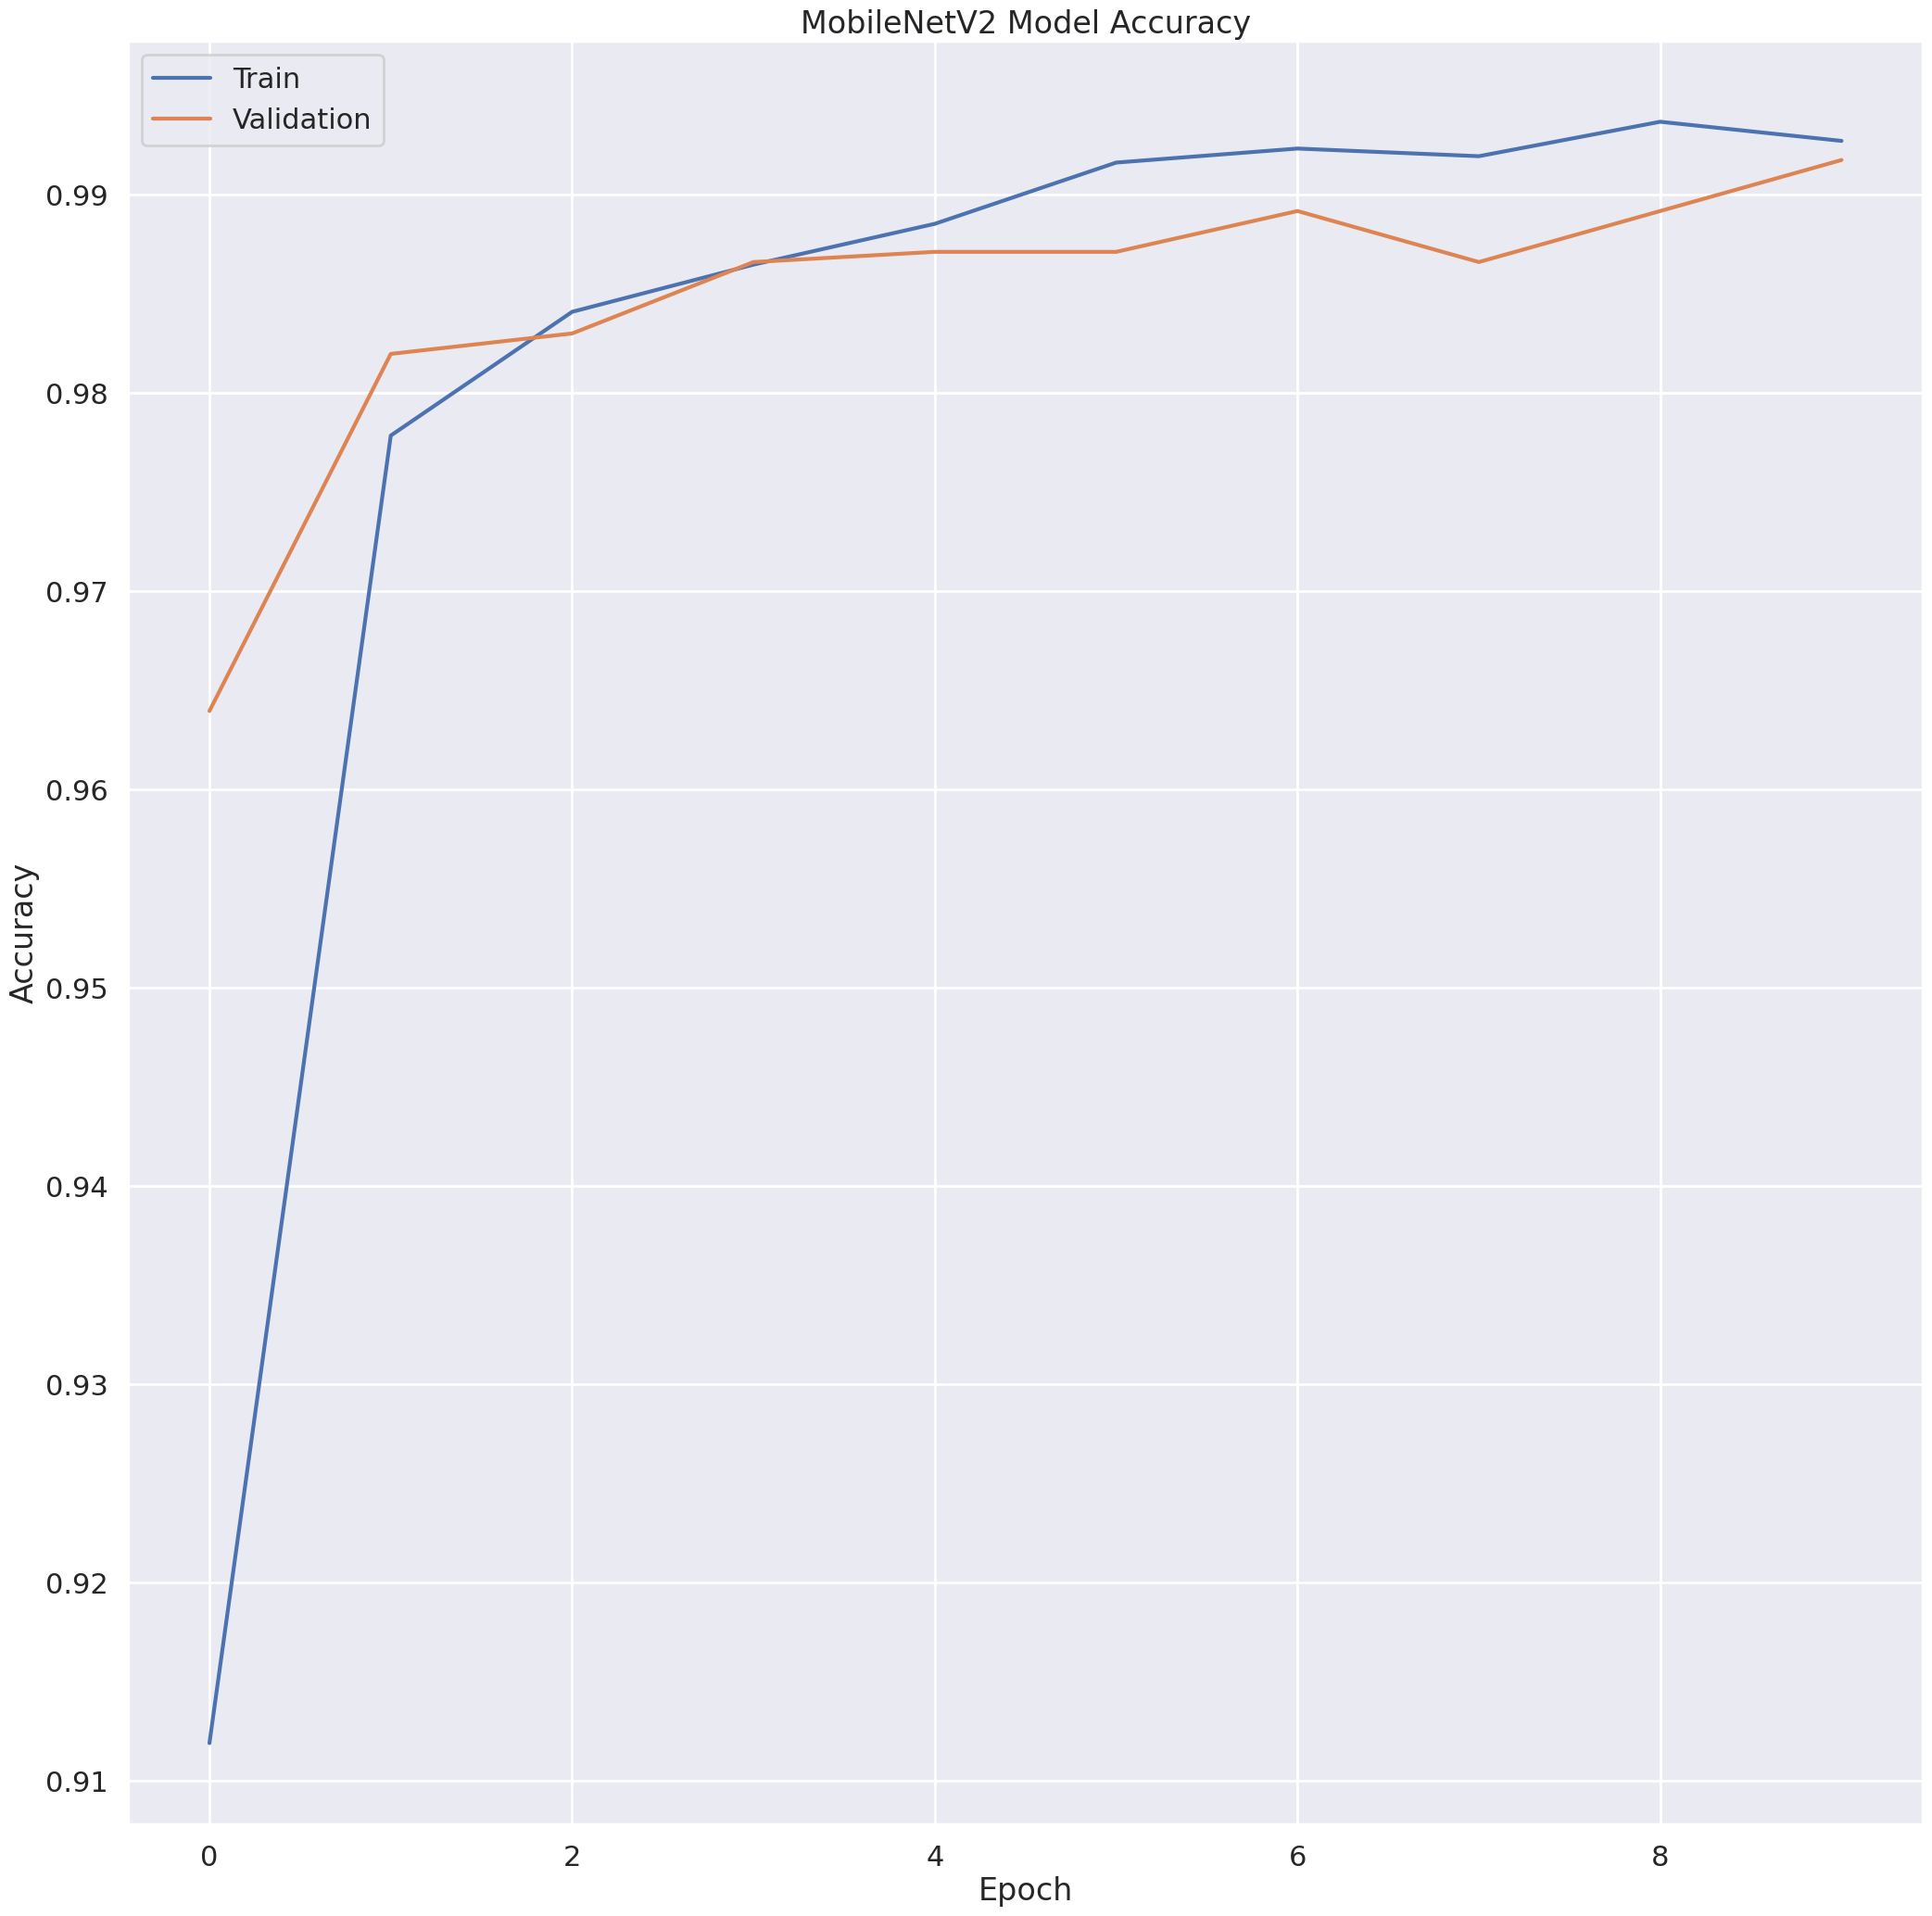

In [20]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history_mobilenetv2.history['accuracy'])
plt.plot(history_mobilenetv2.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(225, 225, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
history = model.fit(train_generator,
                    batch_size = 32,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_batch_size = 32
                   )

Epoch 1/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 296s 580ms/step - accuracy: 0.8503 - loss: 0.5027 - val_accuracy: 0.9768 - val_loss: 0.0638
Epoch 2/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 268s 550ms/step - accuracy: 0.9757 - loss: 0.0727 - val_accuracy: 0.9712 - val_loss: 0.0812
Epoch 3/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 265s 544ms/step - accuracy: 0.9837 - loss: 0.0471 - val_accuracy: 0.9691 - val_loss: 0.0920
Epoch 4/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 342s 585ms/step - accuracy: 0.9765 - loss: 0.0665 - val_accuracy: 0.9810 - val_loss: 0.0537
Epoch 5/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 267s 550ms/step - accuracy: 0.9869 - loss: 0.0349 - val_accuracy: 0.9686 - val_loss: 0.1122
Epoch 6/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 270s 555ms/step - accuracy: 0.9866 - loss: 0.0371 - val_accuracy: 0.9233 - val_loss: 0.3439
Epoch 7/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 266s 548ms/step - accuracy: 0.9869 - loss: 0.0412 - val_accuracy: 0.9907 - val_loss: 0.0348
Epoch 8/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 265s 546ms/step - accuracy: 0.9924 -

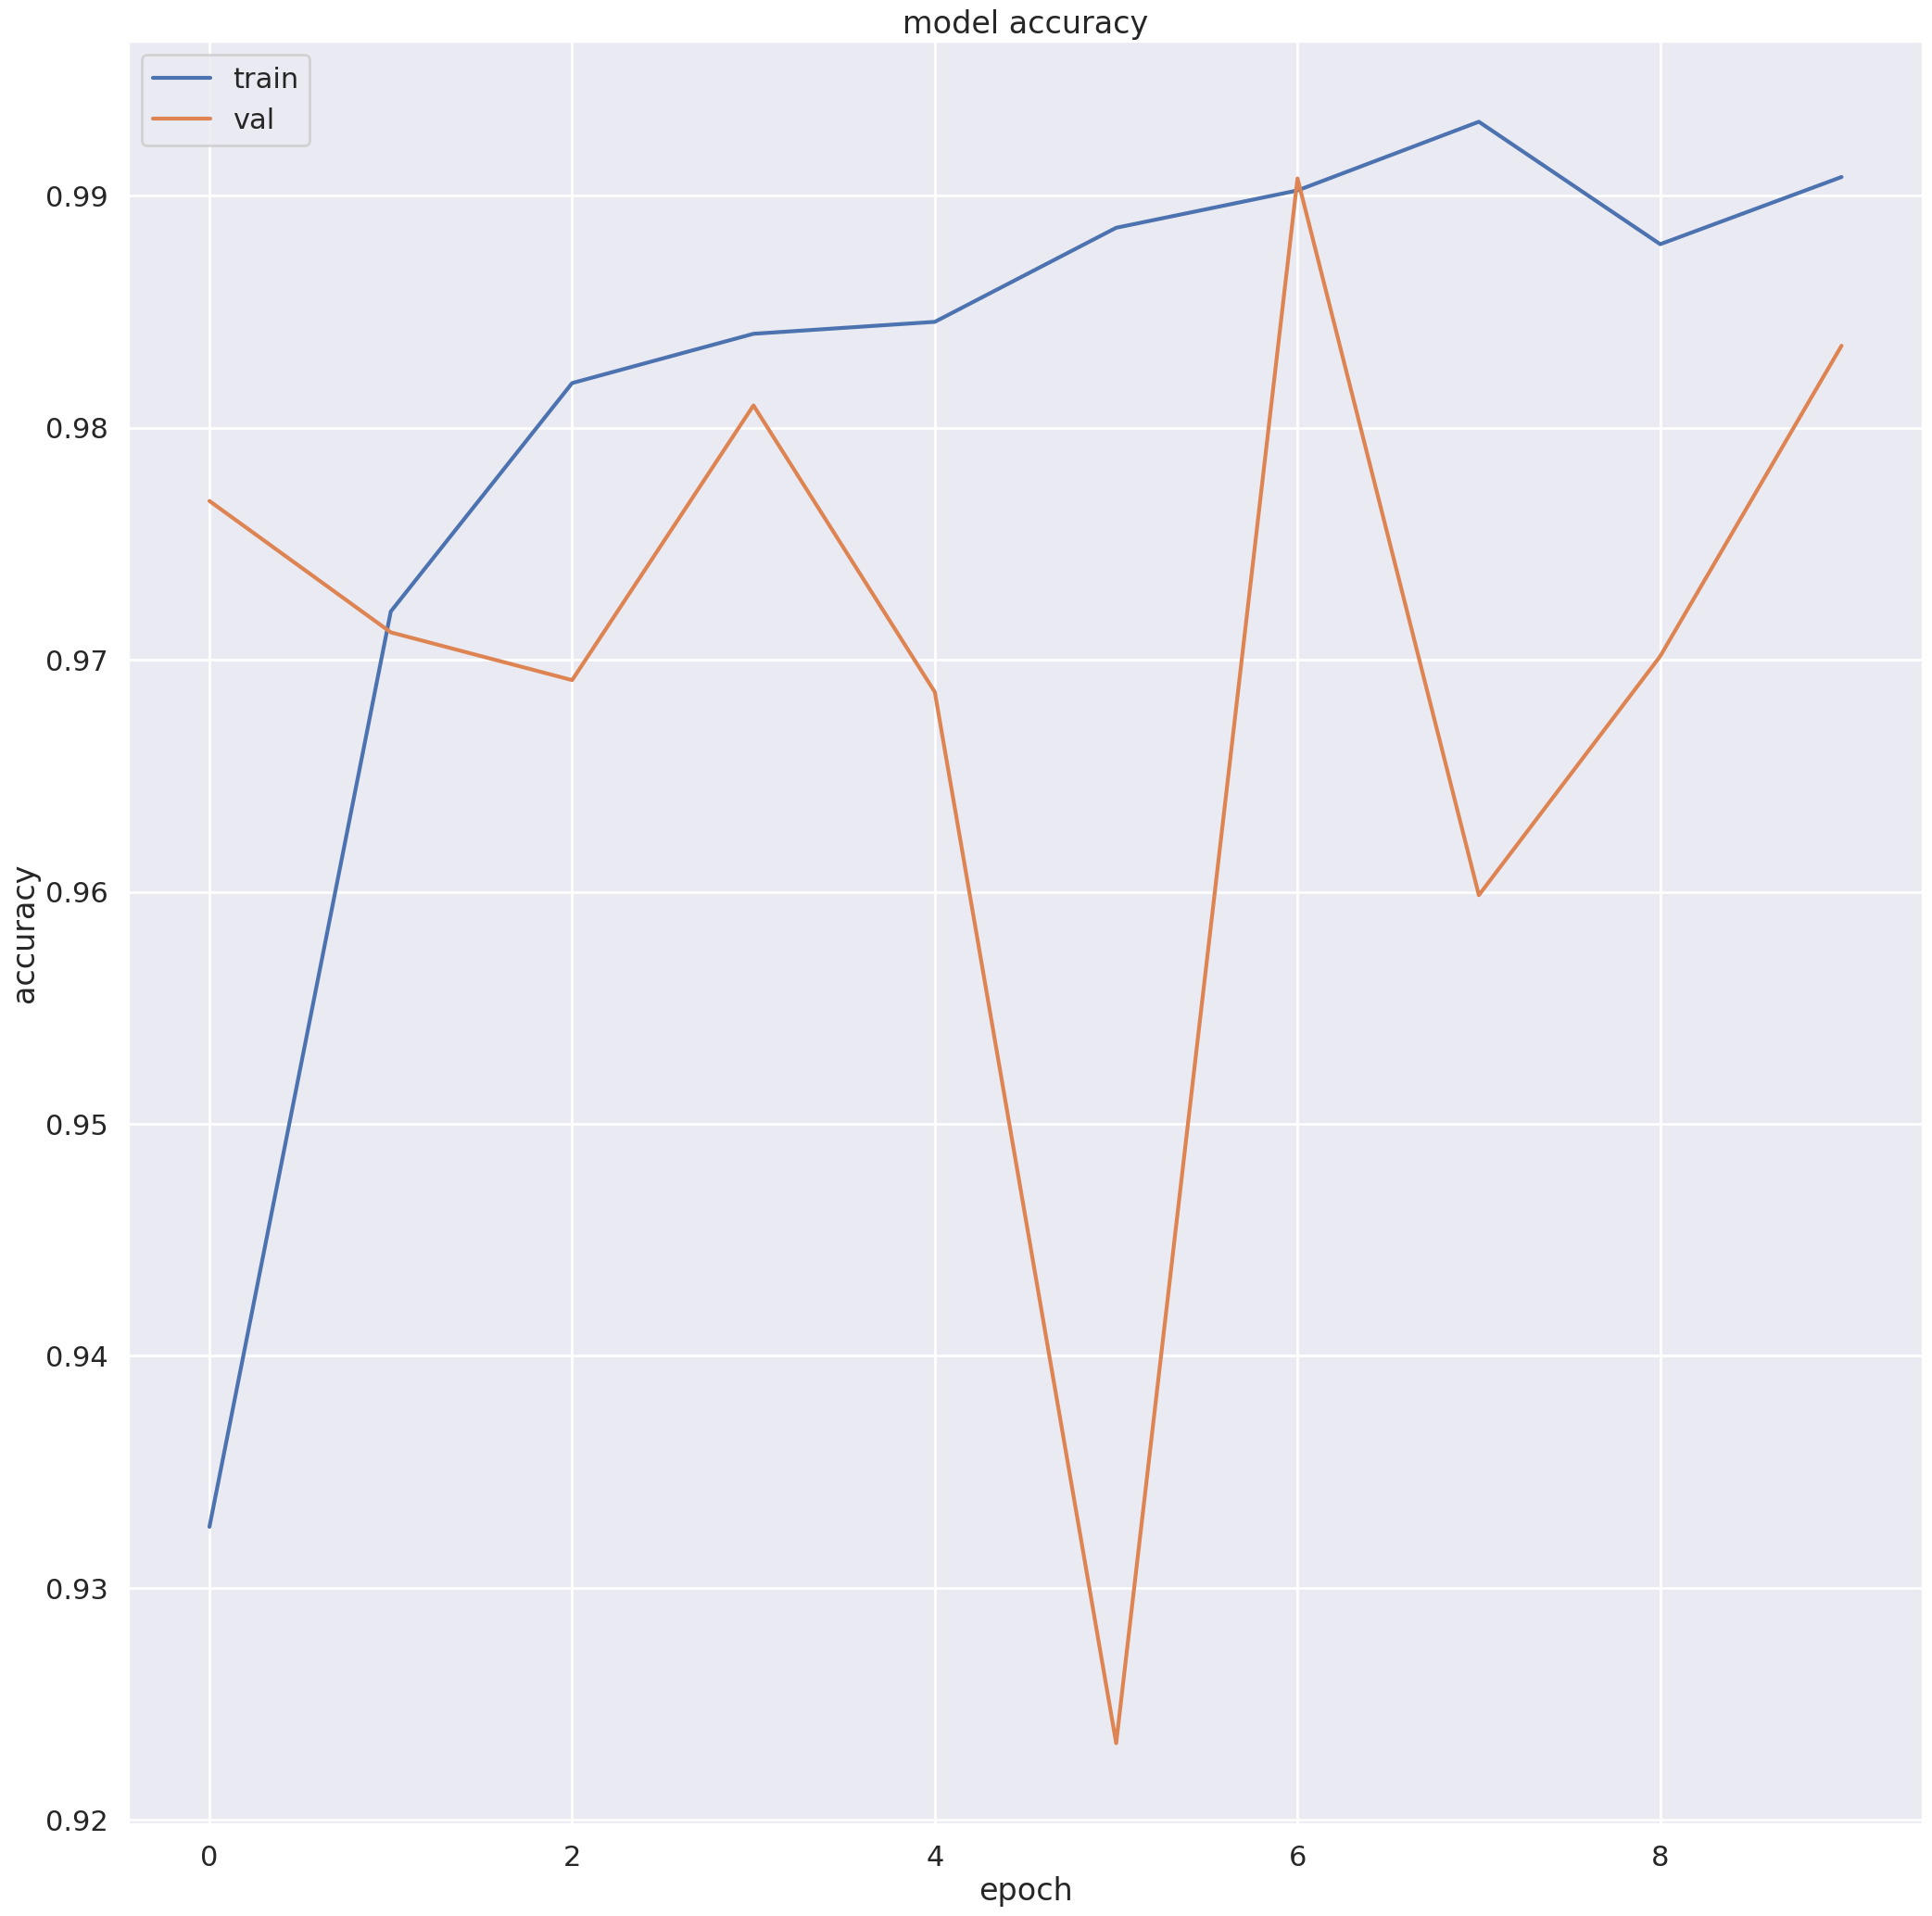

In [23]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize = (25, 25), dpi = 100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [24]:
import keras.saving
keras.saving.save_model(model, "model.keras")

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis = 0)
    return x

x = preprocess_image('/content/drive/MyDrive/Project/Apple Plant Disease/Test/Test/Apple___Scab/4b4b59d5-3c6d-4ce5-b349-616fecb850ff___FREC_Scab 3447_90deg.JPG')

In [26]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([1.4069941e-11, 1.1600039e-09, 2.9277175e-14, 1.0000000e+00],
      dtype=float32)

In [27]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Apple___Black_rot',
 1: 'Apple___Cedar_apple_rust',
 2: 'Apple___Healthy',
 3: 'Apple___Scab'}

In [28]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Apple___Scab
